# Regressão Logística

#### Importando bibliotecas

In [10]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics  import   accuracy_score 
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold

plt.style.use('ggplot')
pd.set_option('display.max_columns', 500) 

In [2]:
def report_teste(predictions, alg_name):

    print('Resultados para o classificador {0}:'.format(alg_name))
    print(classification_report(y_teste, predictions), 
    print ("Acurácia para o treino é ", accuracy_score(y_teste,predictions)))
    
def report_treino(predictions, alg_name):

    print('Resultados para o classificador {0}:'.format(alg_name))
    print(classification_report(y_treino, predictions), 
    print ("Acurácia para o treino é ", accuracy_score(y_treino,predictions)))

#### Dados

In [3]:
dataset = pd.read_csv('C:\\Users\\Fabiel Fernando\\Desktop\\Machine Learning A-Z Template Folder\\Part 3 - Classification\\Section 14 - Logistic Regression\\Logistic_Regression\\Social_Network_Ads.csv')

In [4]:
#Verificando a existência de missings
#dataset.apply(lambda x: x.isnull().sum())

In [5]:
dataset.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
print("Dimensão dos nossos dados:\n", 
     dataset.shape)
#print("Tipo de variáveis:\n",
#     dataset.dtypes)

Dimensão dos nossos dados:
 (400, 5)


#### Pocentagem da variável resposta

In [7]:
resposta = dataset['Purchased']
count = pd.DataFrame(resposta.value_counts())
percent = pd.DataFrame(resposta.value_counts(normalize = True)*100)
table = pd.concat([count, percent], axis = 1)
table.columns = ['# target', '% target']
table

,# target,% target
0,257,64.25
1,143,35.75


In [8]:
#Descritiva de algumas variáveis
#dataset.describe()

#### Treino e Teste

In [13]:
feature_space = dataset.iloc[:, [2, 3]].values
feature_class = dataset.iloc[:, dataset.columns == 'Purchased']

In [14]:
X_treino, X_teste, y_treino, y_teste = train_test_split(feature_space,
                                                                    feature_class,
                                                                    test_size = 0.30, 
                                                                    random_state = 42)

In [15]:
# Limpar conjuntos de teste para evitar futuras mensagens de aviso
y_treino = y_treino.values.ravel() 
y_teste = y_teste.values.ravel() 

In [16]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_treino = sc_X.fit_transform(X_treino)
X_teste = sc_X.transform(X_teste)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Ajustando Regressão Logística

In [17]:
classifier = LogisticRegression(random_state=42)
classifier.fit(X_treino, y_treino)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Precisão do classificador

In [18]:
pred_test = classifier.predict(X_teste)
pred_train = classifier.predict(X_treino)

#### Tabela com cálculo de vária métricas conjunto treino

In [19]:
report_treino(pred_train,'Regressão Logística')

Resultados para o classificador Regressão Logística:
Acurácia para o treino é  0.8285714285714286
             precision    recall  f1-score   support

          0       0.84      0.92      0.88       184
          1       0.81      0.66      0.72        96

avg / total       0.83      0.83      0.82       280
 None


#### Tabela com cálculo de vária métricas conjunto teste

In [20]:
report_teste(pred_test,'Regressão Logística')

Resultados para o classificador Regressão Logística:
Acurácia para o treino é  0.85
             precision    recall  f1-score   support

          0       0.82      0.97      0.89        73
          1       0.94      0.66      0.78        47

avg / total       0.86      0.85      0.84       120
 None


## Ajustando o classificador com Grid Search

In [21]:
fit_lr = LogisticRegression(random_state=42)

In [57]:
np.random.seed(42)
cv_kfold = KFold(10, shuffle = False)

param_grid = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

In [58]:
cv_lr = GridSearchCV(fit_lr,
                     cv = cv_kfold,
                     param_grid = param_grid, 
                     n_jobs = 3)

In [59]:
cv_lr.fit(X_treino, y_treino)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise',
       estimator=LogisticRegression(C=1e-05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [60]:
cv_lr.best_params_

{'C': 1, 'penalty': 'l1'}

In [69]:
fit_lr.set_params(C = 1e-05)

LogisticRegression(C=1e-05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [70]:
fit_lr.fit(X_treino, y_treino)

LogisticRegression(C=1e-05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Resultados Conjunto Treino

In [71]:
pred_train2 = fit_lr.predict(X_treino)
report_treino(pred_train2, 'Regressão Logística com Grid Search')

Resultados para o classificador Regressão Logística com Grid Search:
Acurácia para o treino é  0.7324414715719063
             precision    recall  f1-score   support

          0       0.73      1.00      0.85       219
          1       0.00      0.00      0.00        80

avg / total       0.54      0.73      0.62       299
 None


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Resultados conjunto teste

In [72]:
predictions_fit_lr = fit_lr.predict(X_teste)
report_teste(predictions_fit_lr, 'Regressão Logística com Grid Search')

Resultados para o classificador Regressão Logística com Grid Search:
Acurácia para o treino é  0.38
             precision    recall  f1-score   support

          0       0.38      1.00      0.55        38
          1       0.00      0.00      0.00        62

avg / total       0.14      0.38      0.21       100
 None


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [32]:
predictions_lr = fit_lr.predict(X_teste)

In [33]:
print(confusion_matrix(y_teste, predictions_lr))

[[71  2]
 [17 30]]


In [34]:
accuracy_lr = fit_lr.score(X_teste, y_teste)

print("Aqui está a nossa precisão média no conjunto de testes: {0:.3f}".format(accuracy_lr))

Aqui está a nossa precisão média no conjunto de testes: 0.842


In [35]:
test_error_rate_lr = 1 - accuracy_lr
print("A taxa de erro de teste para o nosso modelo é: {0: .3f}" .format(test_error_rate_lr))

A taxa de erro de teste para o nosso modelo é:  0.158


### Curva ROC

In [36]:
predictions_prob = fit_lr.predict_proba(X_teste)[:, 1]

fpr2, tpr2, _ = roc_curve(y_teste,
                          predictions_prob,
                          pos_label = 1)

In [37]:
auc_lr = auc(fpr2, tpr2)

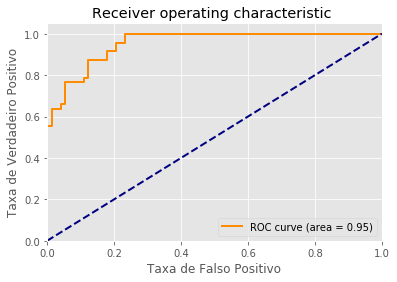

In [38]:
plt.figure()
lw = 2
plt.plot(fpr2, tpr2, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Receiver operating characteristic ')
plt.legend(loc="lower right")
plt.show()

In [39]:
    report_teste(predictions_lr, 'Regressão Logística')

Resultados para o classificador Regressão Logística:
Acurácia para o treino é  0.8416666666666667
             precision    recall  f1-score   support

          0       0.81      0.97      0.88        73
          1       0.94      0.64      0.76        47

avg / total       0.86      0.84      0.83       120
 None


## Validação Cruzada

### K - fold

In [40]:
X = dataset.iloc[:, [2, 3]].values
y = dataset['Purchased'].astype('category')

In [73]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10, random_state=42)
model = LogisticRegression(random_state=42)
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X_teste, y_teste, cv=kfold, scoring=scoring)
results.mean(), results.std()

(0.6199999999999999, 0.13266499161421602)

### LOOCV

In [74]:
model = LogisticRegression(random_state=42)
accuracies = cross_val_score(model, X=X_teste, y=y_teste, cv=LeaveOneOut())
accuracies.mean()

0.62

### Repeat CV

In [75]:
from sklearn.model_selection import RepeatedKFold
cv_repeat = RepeatedKFold(n_splits=6, n_repeats=3, random_state=42)
model = LogisticRegression(random_state=42)
accuracies = cross_val_score(model, X=X_teste, y=y_teste, cv=cv_repeat)
accuracies.mean()

0.6131535947712419

### Separando as k primeiras observações para treino e o restante para teste

In [76]:
dataset.shape

(400, 5)

In [77]:
X_treino = dataset.iloc[0:299, [2,3]].values
y_treino = dataset.iloc[0:299, 4].values


X_teste = dataset.iloc[300:400, [2,3]].values
y_teste = dataset.iloc[300:400, 4].values

In [78]:
clf = LogisticRegression(penalty='l2',
                         dual=False,
                         tol=0.0001,
                         C=1.0,
                         fit_intercept=True,
                         intercept_scaling=1,
                         class_weight=None,
                         random_state=None,
                         solver='liblinear',
                         max_iter=100,
                         multi_class='ovr',
                         verbose=0,
                         warm_start=False,
                         n_jobs=1)
clf.fit(X_treino, y_treino)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Precisão do classificador no Decision Tree

In [79]:
pred_teste = clf.predict(X_teste)
pred_treino = clf.predict(X_treino)

#### Métricas Treino

In [80]:
 report_treino(pred_treino, 'Regressão Logística')

Resultados para o classificador Regressão Logística:
Acurácia para o treino é  0.7391304347826086
             precision    recall  f1-score   support

          0       0.74      1.00      0.85       219
          1       1.00      0.03      0.05        80

avg / total       0.81      0.74      0.63       299
 None


#### Métricas Teste

In [81]:
report_teste(pred_teste, 'Regressão Logística')

Resultados para o classificador Regressão Logística:
Acurácia para o treino é  0.38
             precision    recall  f1-score   support

          0       0.38      1.00      0.55        38
          1       0.00      0.00      0.00        62

avg / total       0.14      0.38      0.21       100
 None


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
